# **Social Network Ads prediction**

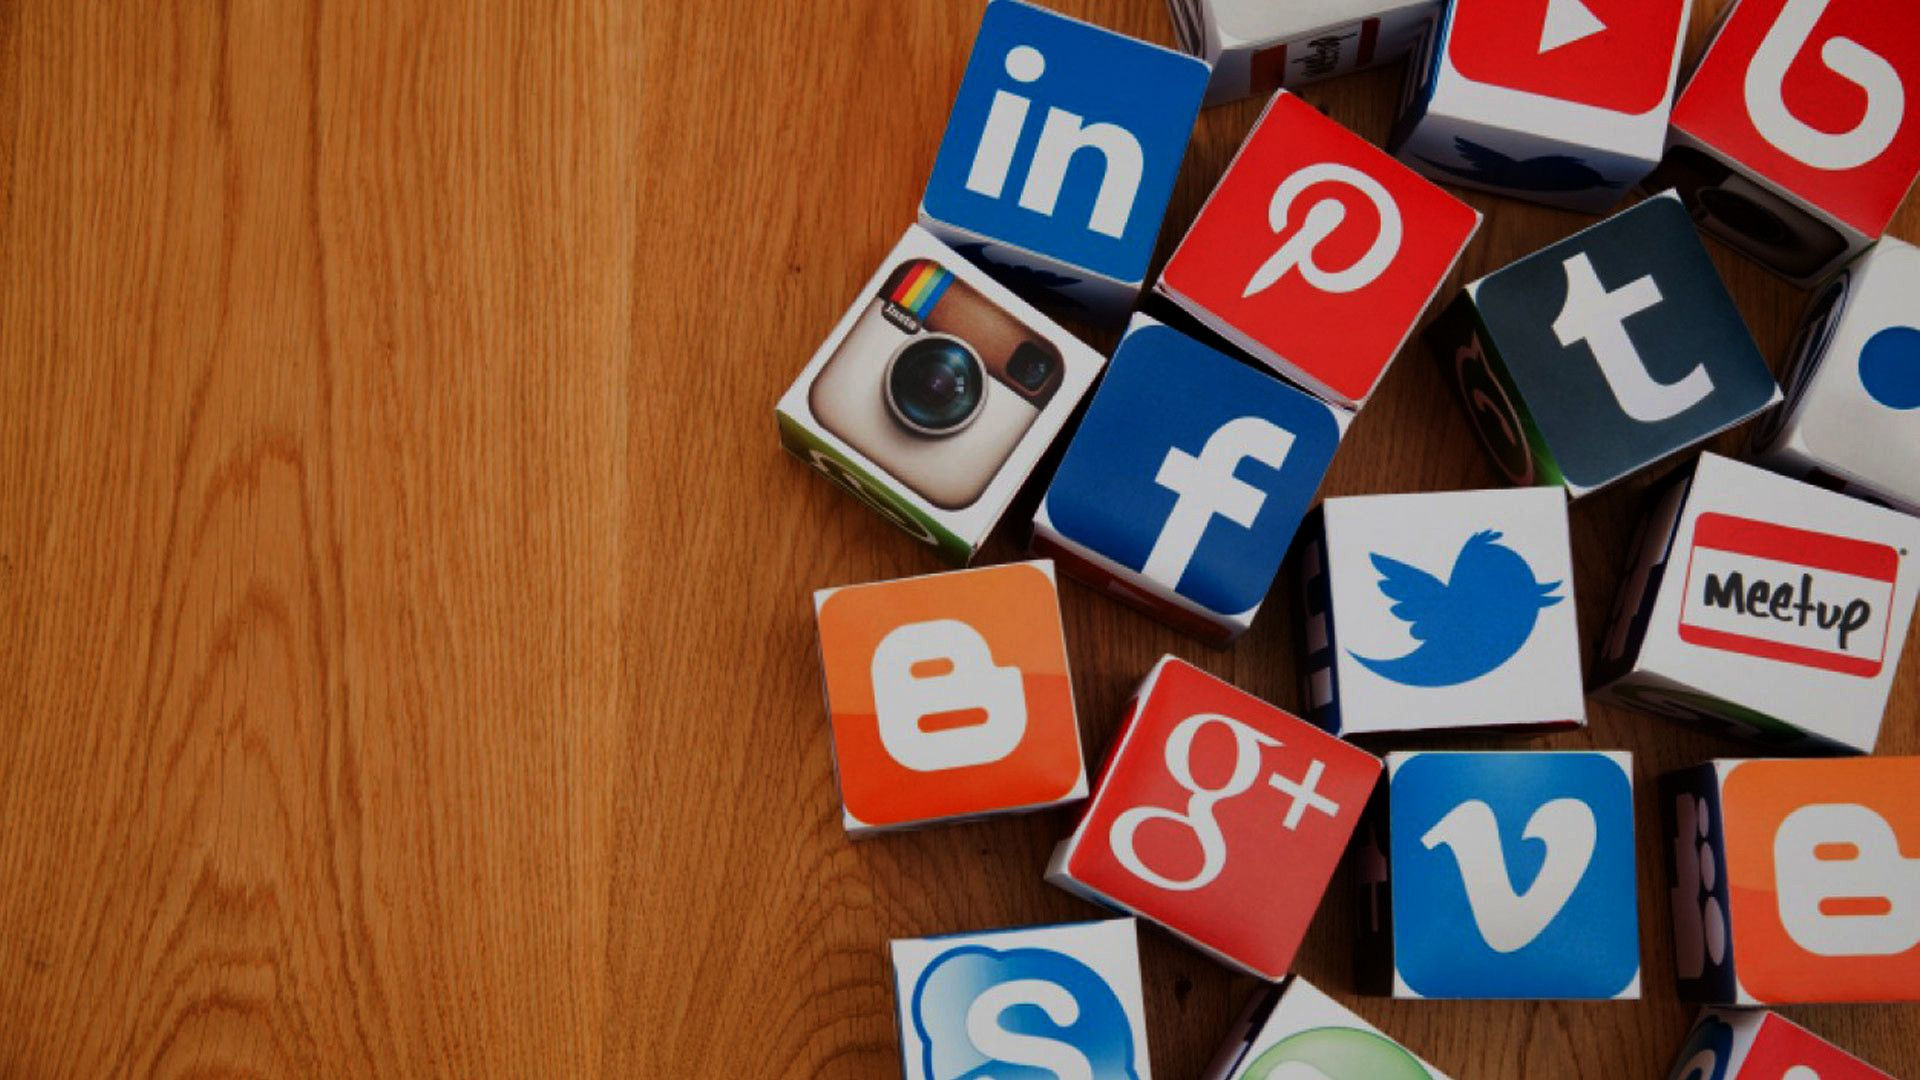

**With two features that is Age and EstimatedSalary we try to predict if the customer purchased the Ad and try to make some analysis out of our data**

# *Importing all the necessary libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
sns.set()

# *Reading data*

In [ ]:
df=pd.read_csv('../input/social-network-ads/Social_Network_Ads.csv')

In [ ]:
df.tail()

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

From the above information we can infer that we do not have any null values in our dataset 

In [ ]:
df.count()

# ***Plotting our Data***

In [ ]:
sns.distplot(df['Age'],)

In [ ]:
sns.distplot(df['EstimatedSalary'],bins=30)

In [ ]:
sns.boxplot(df['EstimatedSalary'])

In [ ]:
sns.boxplot(df['Age'])

From the graphs we can infer that we do not have any outliers in our data and our data is pretty normally distributed  

# ***Splitting data***

In [ ]:
X=df.iloc[:,:2]
Y=df['Purchased']

In [ ]:
X

In [ ]:
Y

## ***Scaling our data and splitting it for train and test modules***

In [ ]:
scale=StandardScaler()
scale.fit(X)
D=scale.transform(X)
x_train, x_test, y_train, y_test = train_test_split(D,Y, test_size=0.20,random_state=300)

# **Building classification models**

# ***Logistic regression***

In [ ]:
R=LogisticRegression()
R.fit(x_train,y_train)
pred=R.predict(x_test)
print(metrics.confusion_matrix(y_test,pred))
print(metrics.classification_report(y_test,pred))

# ***k-nearest neighbors***

In [ ]:
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
a=KNeighborsClassifier(n_neighbors=11)
a.fit(x_train,y_train)
predictions=a.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.classification_report(y_test,predictions))

# ***Random Forest Classifier***

In [ ]:
N=RandomForestClassifier(n_estimators=500)
N.fit(x_train,y_train)
prediction=N.predict(x_test)
print(metrics.confusion_matrix(y_test,prediction))
print(metrics.classification_report(y_test,prediction))

# ***Decision tree classifier***

In [ ]:
Z=DecisionTreeClassifier()
Z.fit(x_train,y_train)
p=Z.predict(x_test)
print(metrics.confusion_matrix(y_test,p))
print(metrics.classification_report(y_test,p))

# ***SVM (Support Vector Machines)***

In [ ]:
model = SVC()
model.fit(x_train,y_train)
pr = model.predict(x_test)
print(metrics.confusion_matrix(y_test,pr))
print(metrics.classification_report(y_test,pr))

**After analysing the data and building models using simple classification methods we can infer that SVM(support vector machine) gives us the best result with an accuracy of 97%**